<a href="https://colab.research.google.com/github/ViktorMyronenko/PythonAI-ITStep/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Student_Performance.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [61]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,NaN,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0


# Завдання 1
Продивіться дані, видаліть пропущені значення з стовпчика `Perfomance Index`

<Axes: >

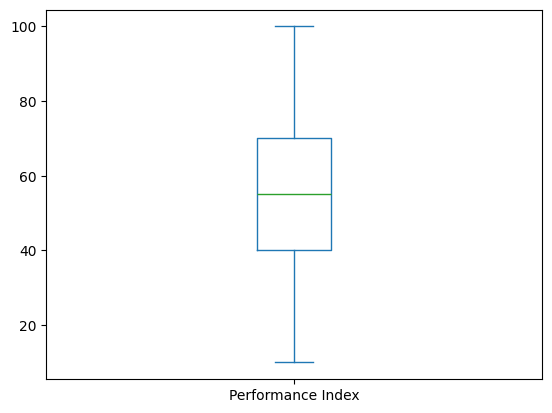

In [62]:
df.isnull().sum()

df.dropna(inplace=True)

df['Performance Index'].plot(kind='box')

# Завдання 2
Розбийте дані на тренувальні та тестові

In [63]:
from sklearn.model_selection import train_test_split

X = df[['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced', 'Previous Scores']]
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
X_train.shape



(5852, 4)

# Завдання 3
Побудуйте `Pipeline` для заповнення пропущених значень в усіх стовпчиках.
Або заповніть пропуски медіаною кожного стовпчика.

# Завдання 4
Побудуйте модель та натренуйте її, виведіть метрики

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# тренування
model.fit(X_train, y_train)

y_pred = model.predict(X_train)



In [65]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [66]:
result = pd.DataFrame()
result['train'] = get_metrics(y_train, y_pred)

y_pred = model.predict(X_test)
result['test'] = get_metrics(y_test, y_pred)

result

,train,test
MAE,1.65,1.60
MSE,4.28,4.11
RMSE,2.07,2.03
R2,0.99,0.99


# Завдання 5 оптимально
Спробуйте покращити модель

In [67]:
model.coef_

array([2.85829291, 0.48358819, 0.19360013, 1.01865987])